In [1]:
import pandas as pd
import numpy as np

In [25]:
train = pd.read_csv('./dataset/train.csv')
train.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [26]:
a = train['Stay'].value_counts().to_dict()
a

{'21-30': 87491,
 '11-20': 78139,
 '31-40': 55159,
 '51-60': 35018,
 '0-10': 23604,
 '41-50': 11743,
 '71-80': 10254,
 'More than 100 Days': 6683,
 '81-90': 4838,
 '91-100': 2765,
 '61-70': 2744}

In [27]:
# target_dict = {0:'0-10',1:'11-20',2:'21-30',3:'31-40',4:'41-50',5:'51-60',6:'61-70',7:'71-80',8:'81-90',9:'91-100',10:'More than 100 Days' }
target_dict = {'21-30': 2,
 '11-20': 1,
 '31-40': 3,
 '51-60': 5,
 '0-10': 0,
 '41-50': 4,
 '71-80': 7,
 'More than 100 Days': 10,
 '81-90': 8,
 '91-100': 9,
 '61-70': 6}

In [69]:
submn = pd.read_csv('./dataset/submission_notmapped.csv')
submn['Stay'].value_counts()

2     57025
1     40196
5     18800
3     12781
0      4431
10     2139
8      1118
7       396
4        83
9        69
6        19
Name: Stay, dtype: int64

In [70]:
target_dict = {0:'0-10',1:'11-20',2:'21-30',3:'31-40',4:'41-50',5:'51-60',6:'61-70',7:'71-80',8:'81-90',9:'91-100',10:'More than 100 Days' }

In [71]:
submn['Stay'] = submn['Stay'].map(target_dict)

In [72]:
submn['Stay'].value_counts()

21-30                 57025
11-20                 40196
51-60                 18800
31-40                 12781
0-10                   4431
More than 100 Days     2139
81-90                  1118
71-80                   396
41-50                    83
91-100                   69
61-70                    19
Name: Stay, dtype: int64

In [74]:
submn.to_csv('./dataset/updated_file.csv',index=False,encoding="utf-8")

In [28]:
train['Stay'] = train['Stay'].map(target_dict)

In [29]:
train['Stay'].value_counts()

2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

In [30]:
test = pd.read_csv('./dataset/test.csv')
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [31]:
y = train['Stay'].values
train.drop('Stay',axis = 1,inplace=True)

In [32]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [33]:
print(train.shape,test.shape)

(318438, 17) (137057, 17)


In [34]:
train_test = pd.concat([train,test],axis=0)
train_test.shape

(455495, 17)

In [35]:
train_test.to_csv('./dataset/train_test_combined.csv',index = False)

# fill the missing values

In [36]:
train_test.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             148
patientid                               0
City_Code_Patient                    6689
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [37]:
train_test.fillna(method='ffill',inplace=True)

In [38]:
train_test.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [39]:
# train_try = train.copy()
# train_try.drop('case_id',axis = 1,inplace = True)
# train_try.index = train_try.patientid
# train_try = train_try.sort_index()
# print(train_try.shape)
# train_try.drop_duplicates(inplace=True)
# print(train_try.shape)
# print(train_try.isnull().sum())

In [40]:
# train['patientid'].value_counts()

In [274]:
train.groupby('patientid')['Admission_Deposit'].mean().to_dict()

{1: 5214.0,
 2: 5726.0,
 4: 5122.0,
 6: 5918.0,
 7: 5572.0,
 9: 4100.5,
 10: 4281.5,
 13: 4120.666666666667,
 14: 6086.0,
 17: 4136.0,
 18: 3756.0,
 19: 6673.0,
 21: 5090.083333333333,
 22: 5509.25,
 26: 6418.0,
 29: 4411.6,
 30: 5116.0,
 31: 4616.0,
 33: 4910.0,
 35: 4061.0,
 36: 4348.4,
 38: 4112.5,
 39: 4803.6,
 41: 4970.75,
 42: 5968.833333333333,
 43: 5331.25,
 45: 8174.0,
 49: 5724.5,
 50: 4366.0,
 51: 4401.2,
 53: 3920.6,
 54: 4476.833333333333,
 55: 4761.6,
 57: 4013.5,
 58: 6348.0,
 59: 5127.0,
 63: 5179.0,
 64: 4344.0,
 66: 5571.0,
 67: 3932.0,
 68: 5150.857142857143,
 69: 4628.5,
 70: 6341.25,
 71: 3951.0,
 73: 6940.5,
 74: 4157.0,
 76: 5128.0,
 77: 3789.5,
 78: 4573.75,
 79: 4295.5,
 82: 4897.333333333333,
 83: 4718.4,
 84: 4378.5,
 85: 5076.0,
 86: 5792.5,
 88: 4550.0,
 89: 4486.333333333333,
 90: 3687.0,
 91: 4448.0,
 92: 4222.833333333333,
 93: 4883.666666666667,
 94: 6856.333333333333,
 95: 4827.0,
 97: 4727.666666666667,
 100: 5130.0,
 101: 3968.3333333333335,
 102: 35

In [12]:
train_new = train.copy()
train_new.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [41]:
train_test['mean deposite per paitient'] = train_test['patientid'].map(train_test.groupby('patientid')['Admission_Deposit'].mean().to_dict())
train_test.shape

(455495, 18)

In [42]:
train_test['critical'] = train_test['Type of Admission'] + train_test['Severity of Illness']
train_test.shape

(455495, 19)

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
# train_new.fillna(train_new['Bed Grade'].mode()[0],inplace=True)

In [21]:
# train_new_1 = OrdinalEncoder().fit_transform(train_new[['critical','Type of Admission','Severity of Illness']])

In [26]:
# train_new_1 = pd.DataFrame(data = train_new_1, columns= ['critical','Type of Admission','Severity of Illness'])
# train_new_1.head()

In [27]:
# # train.groupby('patientid')['Department'].count().to_dict()
# for key, value in train.groupby('patientid')['Department'].count().to_dict().items():
#     if value == 50:
#         print(key)

In [28]:
# train_new[train_new['patientid'] == 66714]

In [29]:
# train_new[train_new['patientid'] == 253799]

In [43]:
train_test['number of Department visisted'] = train_test['patientid'].map(train_test.groupby('patientid')['Department'].count().to_dict())
train_test.shape

(455495, 20)

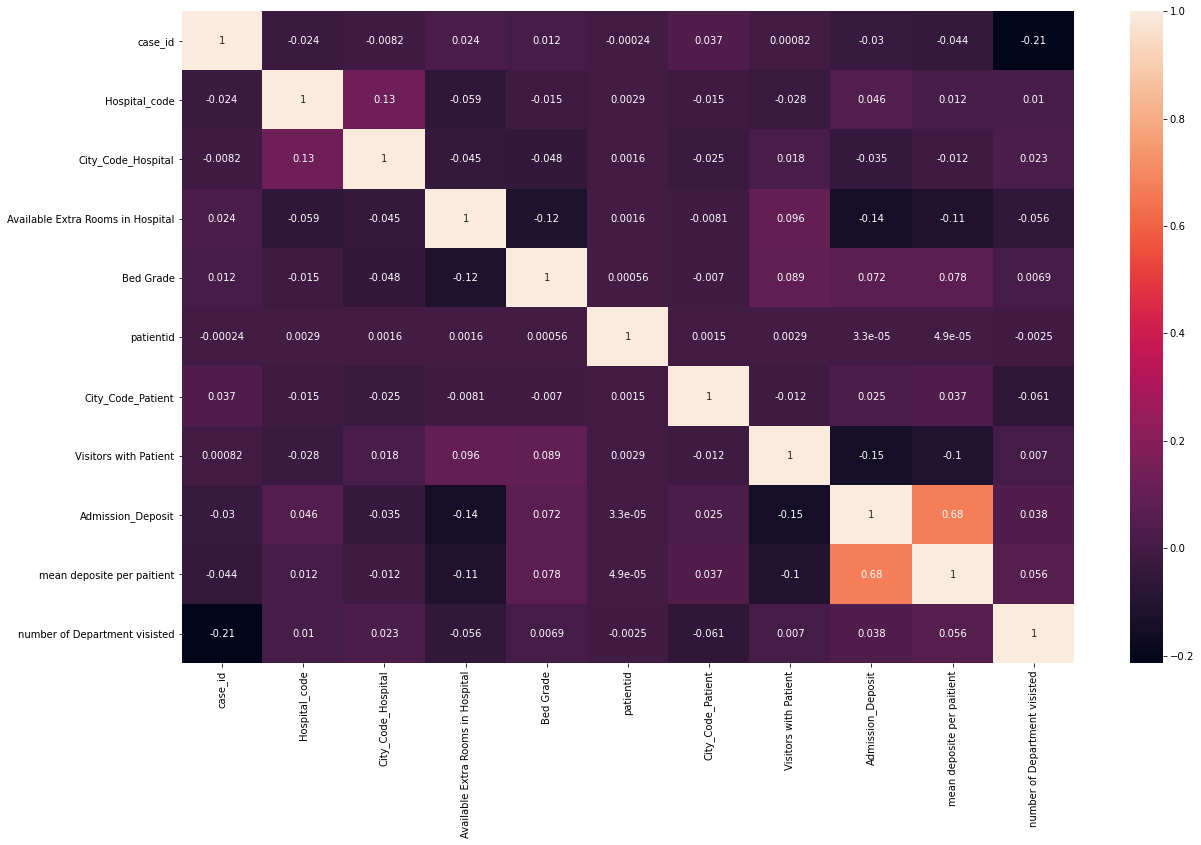

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
sns.heatmap(train_test.corr(),annot = True)

In [33]:
# set(train_new['number of Department visisted'].values.tolist())

In [34]:
# train_new.head(20)
# train_new[train_new['number of Department visisted'] == 50]

In [35]:
# train_new.index = sorted(train_new['patientid'])

In [36]:
# train_new.head()

In [37]:
# train_new.tail()

* ordinal ----> 'Hospital_type_code','Ward_Type','Ward_Facility_Code','Severity of Illness','Age',Stay'
* onehot  ----> 'Hospital_region_code','Department','Type of Admission',

In [38]:
# train.shape

In [44]:
column_info = pd.read_csv('./dataset/train_data_dict.csv')
column_info

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


# Hypothesis:
1. Department ----> 	Department overlooking the case
2. Type of Admission ----> Admission Type registered by the Hospital
3. Severity of Illness ----> Severity of the illness recorded at the time of admission
4. Age ----> Age of the patient
5. targhet columns ---> 'Stay'

* these are the features which can he a good classifier

### Check each data one by one
 * first i will work only for above 4 features

In [6]:
target = 'Stay'
features = train.columns
features

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [7]:
train['Department'].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [8]:
train['Type of Admission'].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [9]:
train['Severity of Illness'].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [10]:
train['Age'].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [11]:
train['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

### based on the features see how many days patitents stayed

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Department,,,,,,,,,,,
TB & Chest disease,791,2379,2618,1753,300,1047,76,294,140,64,124
anesthesia,1519,8823,8950,4958,851,2527,173,703,384,156,605
gynecology,18849,59690,68383,43535,9671,27989,2226,8165,3748,2269,4961
radiotherapy,2379,6988,7263,4713,879,3256,264,1043,528,256,947
surgery,66,259,277,200,42,199,5,49,38,20,46


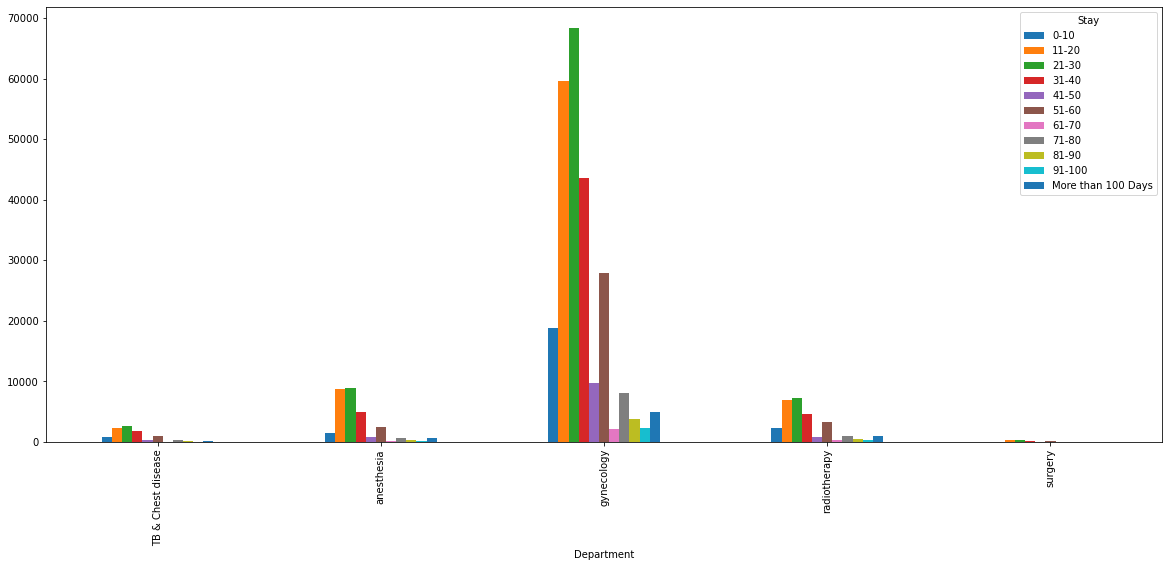

In [12]:
pd.crosstab(train['Department'],train[target]).plot(kind = 'bar',figsize = (20,8))
pd.crosstab(train['Department'],train[target])

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
number of Department visisted,,,,,,,,,,,
1,1300,4586,5436,3668,1333,2138,286,683,300,210,409
2,2668,9068,9757,6604,1687,3944,430,1231,581,383,717
3,3373,11084,12653,8447,1857,5211,515,1580,759,496,993
4,3463,11685,13507,8709,1924,5779,454,1672,747,456,948
5,3247,11120,12940,8297,1675,5222,361,1573,678,421,796
6,2710,9458,10974,6426,1192,4234,257,1112,510,253,626
7,2239,7395,7952,4810,782,3077,159,846,404,178,536
8,1480,4928,5443,3034,533,1945,93,565,286,113,316
9,1073,3333,3482,2051,301,1315,56,350,194,93,316


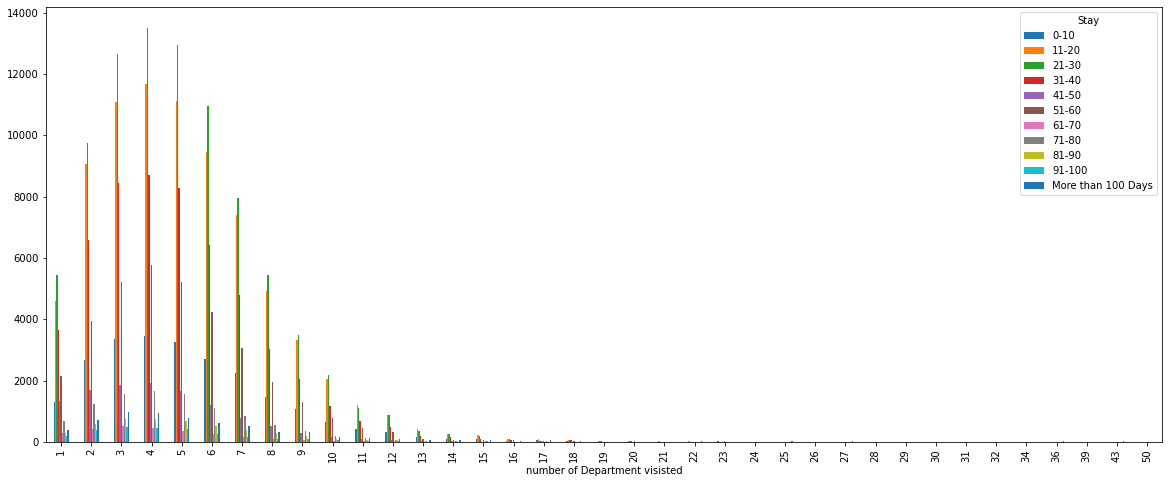

In [307]:

pd.crosstab(train_new['number of Department visisted'],train_new[target]).plot(kind = 'bar',figsize = (20,8))
pd.crosstab(train_new['number of Department visisted'],train_new[target])

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Type of Admission,,,,,,,,,,,
Emergency,14218,31559,27399,18921,4145,11885,976,3375,1708,935,2555
Trauma,5328,33745,46244,28107,5968,18310,1479,5551,2548,1518,3463
Urgent,4058,12835,13848,8131,1630,4823,289,1328,582,312,665


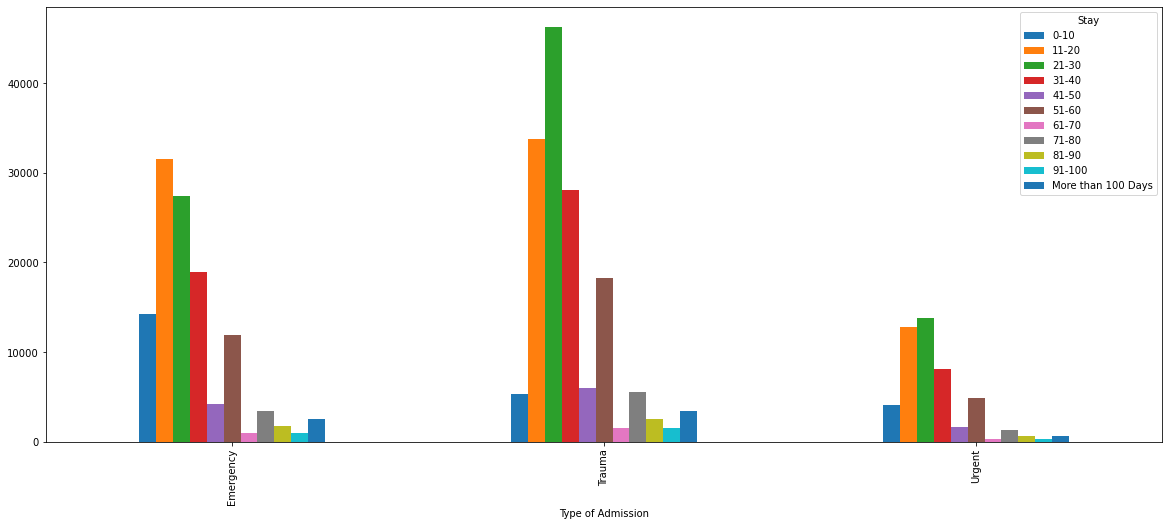

In [13]:
pd.crosstab(train['Type of Admission'],train[target]).plot(kind = 'bar',figsize = (20,8))
pd.crosstab(train['Type of Admission'],train[target])

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Severity of Illness,,,,,,,,,,,
Extreme,3399,10518,15502,10086,2351,7777,647,2575,1113,805,1950
Minor,7866,27081,21535,14447,3000,7128,519,1928,985,425,958
Moderate,12339,40540,50454,30626,6392,20113,1578,5751,2740,1535,3775


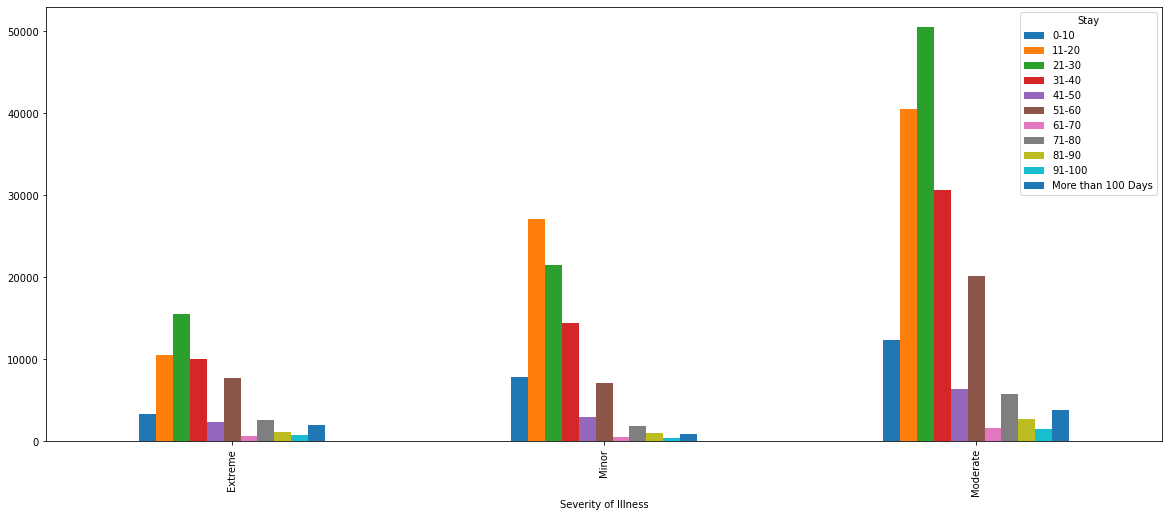

In [14]:
pd.crosstab(train['Severity of Illness'],train[target]).plot(kind = 'bar',figsize = (20,8))
pd.crosstab(train['Severity of Illness'],train[target])

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Age,,,,,,,,,,,
0-10,615,1959,1489,1014,187,582,26,153,84,35,110
11-20,1552,5343,4312,2681,510,1429,89,350,223,71,208
21-30,3467,11272,11394,6912,1398,3793,263,1026,546,231,541
31-40,4916,15792,18550,10912,2373,6517,509,1807,801,484,978
41-50,4727,14959,17906,10983,2507,7189,562,2146,885,578,1307
51-60,3427,11346,13058,8569,1735,5739,448,1710,784,499,1199
61-70,2194,7870,9033,5930,1205,4081,325,1230,600,330,889
71-80,2201,7958,9534,6420,1383,4433,378,1367,670,386,1062
81-90,422,1392,1920,1504,379,1082,115,402,216,132,326


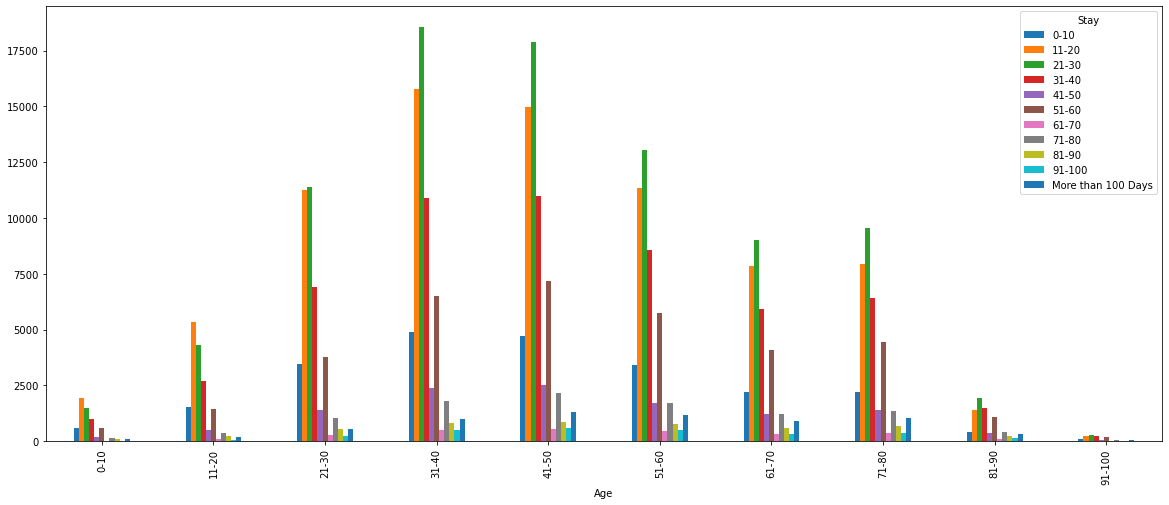

In [15]:
pd.crosstab(train['Age'],train[target]).plot(kind = 'bar',figsize = (20,8))
pd.crosstab(train['Age'],train[target])

## Onservations:
1. maximum patients came for gynecology and they stayed on average 11-40 days
2. in surgery departments patients stayed less number of days
3. in case if Emergency patients stayed up to 40 days some are more than this
4. in case of Trauma patients stayed  11-40 days some are more than this
5. in case of Urgent less patiemts came and  patients stayed for less number of days compare to others
6. in case of Moderate more patients came and they stayed more number of days , other two are almost same
7. patients having age 0-20 and 91+ stayed less number of days. and other age group patients stayed more and 21-30 days is maximum for them

In [16]:
train['Hospital_type_code'].value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Hospital_type_code,,,,,,,,,,,
a,10559,39807,40286,23974,4111,14617,924,3722,1890,962,2573
b,5145,13933,19541,12385,3893,6909,917,2608,1026,783,1806
c,3588,10318,12526,8222,1872,5176,430,1611,725,439,1021
d,1314,4423,5527,3706,760,2713,186,761,421,180,398
e,1805,6644,6524,4060,764,2832,197,824,395,218,507
f,1023,2332,1897,2093,204,1960,44,482,254,138,276
g,170,682,1190,719,139,811,46,246,127,45,102


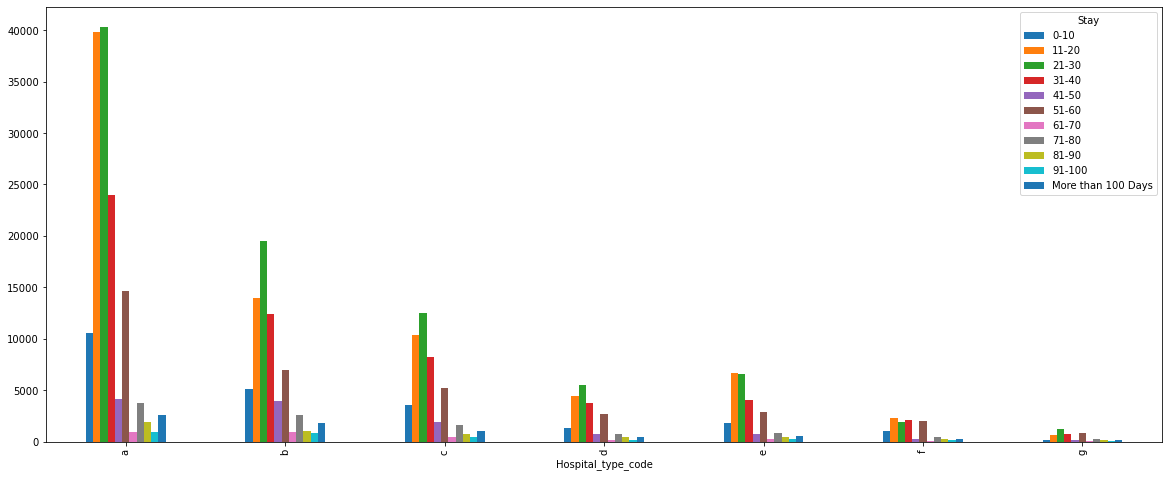

In [17]:
pd.crosstab(train['Hospital_type_code'],train[target]).plot(kind = 'bar',figsize = (20,8))
pd.crosstab(train['Hospital_type_code'],train[target])

* maximum patients stayed in hsopita type a

In [18]:
train['Hospital_region_code'].value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Hospital_region_code,,,,,,,,,,,
X,8145,33885,38768,22830,4405,14723,1012,4091,1910,1147,2420
Y,10447,29786,31595,21314,5036,13023,1184,4069,1940,1068,2966
Z,5012,14468,17128,11015,2302,7272,548,2094,988,550,1297


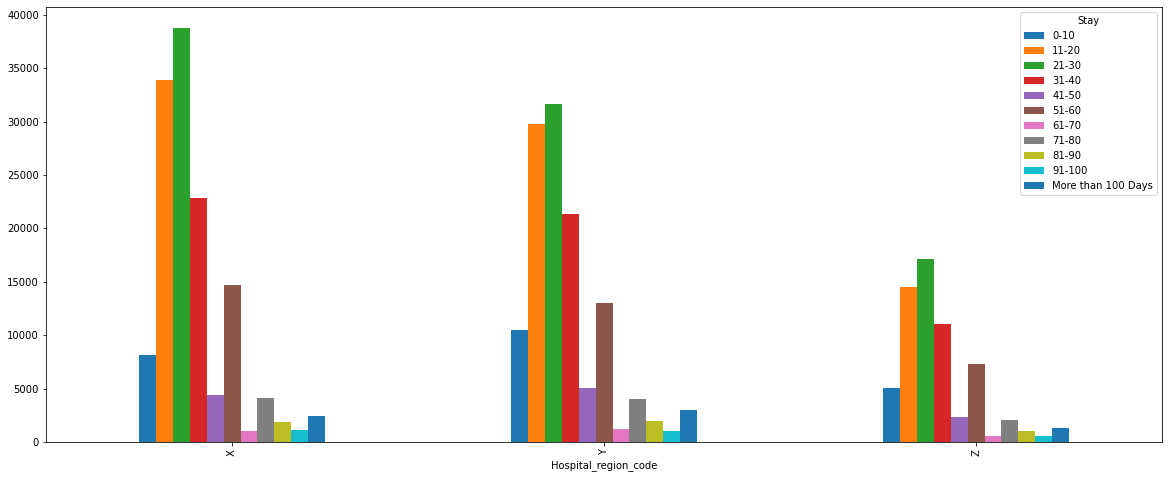

In [19]:
pd.crosstab(train['Hospital_region_code'],train[target]).plot(kind = 'bar',figsize = (20,8))
pd.crosstab(train['Hospital_region_code'],train[target])

* almost equal number of patients came and stayed for different different hospital regions

In [20]:
train['Ward_Type'].value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Ward_Type,,,,,,,,,,,
P,461,1393,1802,745,285,186,73,53,14,16,18
Q,8315,29204,34736,17177,4946,6507,986,1953,792,461,1088
R,9310,31621,36698,22047,4269,13733,1045,4006,1692,1118,2408
S,5407,15649,13862,14897,2174,14402,627,4186,2301,1150,3139
T,110,269,390,291,69,190,13,56,39,20,30
U,1,3,3,2,0,0,0,0,0,0,0


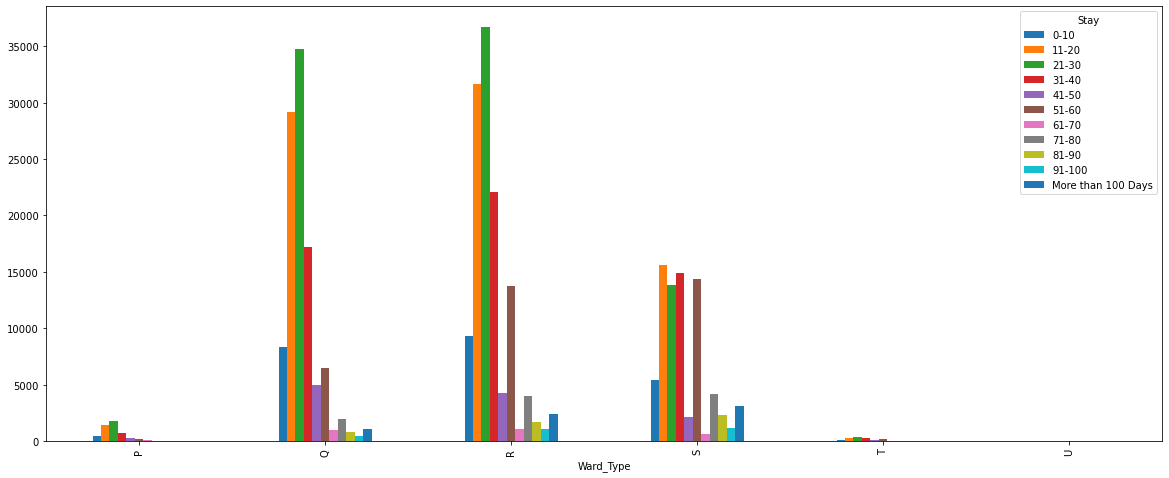

In [21]:
pd.crosstab(train['Ward_Type'],train[target]).plot(kind = 'bar',figsize = (20,8))
pd.crosstab(train['Ward_Type'],train[target])

* maximum patients stayed in Q,R,S wards

In [22]:
train['Ward_Facility_Code'].value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Ward_Facility_Code,,,,,,,,,,,
A,2382,6135,7476,5003,1198,3155,255,967,408,291,636
B,2607,7874,8629,6421,1090,5059,250,1381,768,339,738
C,3921,12068,7867,5591,595,3225,138,721,400,156,781
D,3919,9844,15099,9302,3351,4739,796,1967,772,573,1447
E,3486,15081,16357,9215,1704,5608,411,1511,735,386,857
F,7289,27137,32063,19627,3805,13232,894,3707,1755,1020,2224


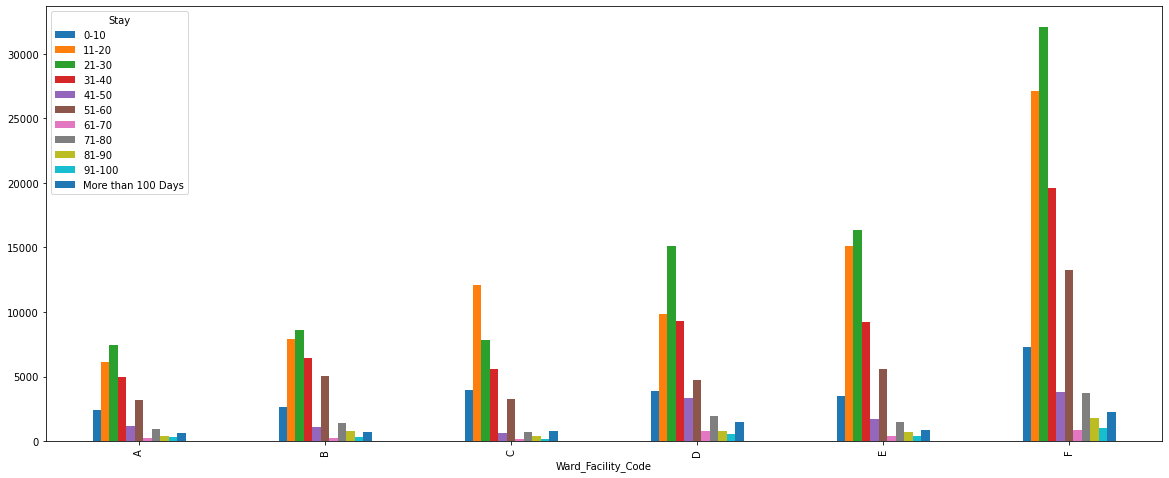

In [23]:
pd.crosstab(train['Ward_Facility_Code'],train[target]).plot(kind = 'bar',figsize = (20,8))
pd.crosstab(train['Ward_Facility_Code'],train[target])

* patients stayed  ore number of days if ward facility is good

In [24]:
train['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Bed Grade,,,,,,,,,,,
1.0,2318,5608,7530,4412,1080,3101,275,1006,358,278,539
2.0,9293,25550,41615,20123,5114,13697,1137,3560,1240,925,1417
3.0,7884,31078,25573,20157,3646,11878,834,3637,2045,1011,2840
4.0,4107,15884,12736,10445,1895,6329,494,2047,1194,550,1885


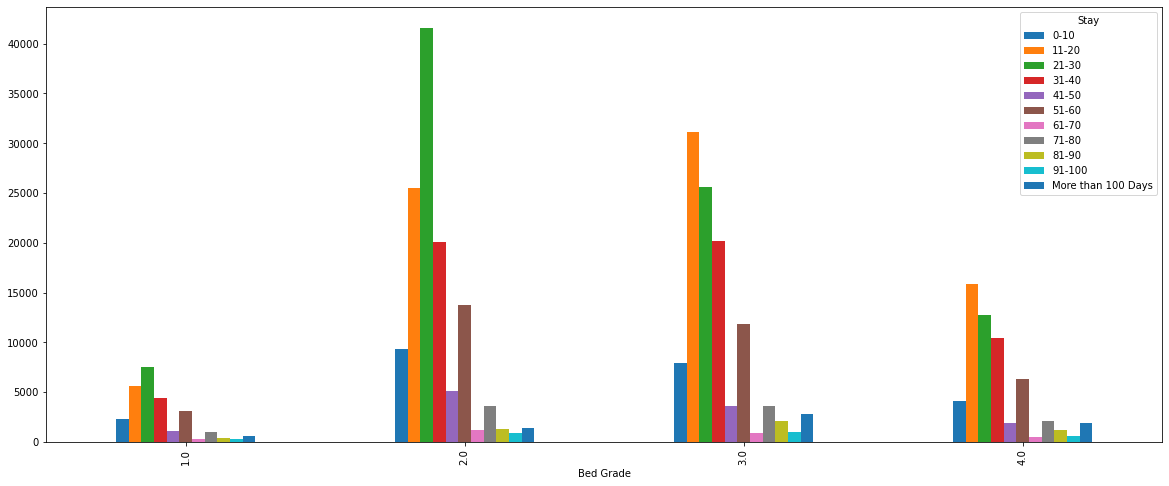

In [25]:
pd.crosstab(train['Bed Grade'],train[target]).plot(kind = 'bar',figsize = (20,8))
pd.crosstab(train['Bed Grade'],train[target])

* for bed)grade 2 and 3 more number of patients stayed 

### one numerical variablw which can be usefull classifier 
1. Admission_Deposit

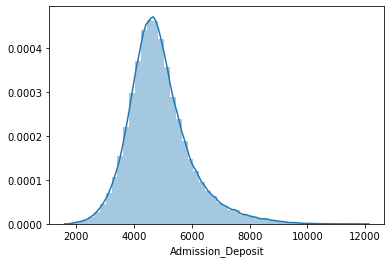

In [40]:
import seaborn as sns
sns.distplot(train_test['Admission_Deposit'],hist = True,kde = True)

* Admission_Deposit is normally distributed
### now check mean of the deposite for which patitents got admited

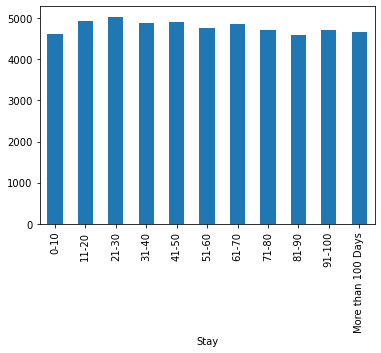

In [27]:
train.groupby(target)['Admission_Deposit'].mean().plot(kind = 'bar')

### check for outliers

* almost same for each age group

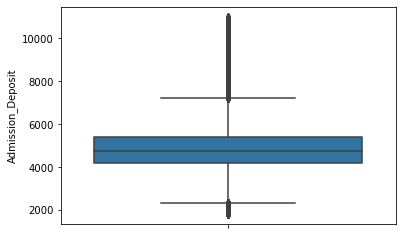

In [28]:
sns.boxplot(train['Admission_Deposit'],orient = 'v')

* many outliers

## useful features are:
1. featues_usefull = ['Department','Type of Admission','Severity of Illness','Age','Hospital_type_code','Hospital_region_code','Ward_Type','Ward_Facility_Code','Bed Grade','Admission_Deposit']



In [41]:
# train.describe().T
train_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,mean deposite per paitient,critical,number of Department visisted
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,5951.0,EmergencyExtreme,14
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,5951.0,TraumaExtreme,14
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,5951.0,TraumaExtreme,14
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,5951.0,TraumaExtreme,14
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,5951.0,TraumaExtreme,14


In [31]:
#data_1.to_csv('./dataset/train_updated.csv',index = False)
train_updated = pd.read_csv('./dataset/train_updated.csv')
train_updated.head()

,Department,Type of Admission,Severity of Illness,Age,Hospital_type_code,Hospital_region_code,Ward_Type,Ward_Facility_Code,Bed Grade,Admission_Deposit,Stay
0,radiotherapy,Emergency,Extreme,51-60,c,Z,R,F,2.0,4911.0,0-10
1,radiotherapy,Trauma,Extreme,51-60,c,Z,S,F,2.0,5954.0,41-50
2,anesthesia,Trauma,Extreme,51-60,e,X,S,E,2.0,4745.0,31-40
3,radiotherapy,Trauma,Extreme,51-60,b,Y,S,D,2.0,5558.0,41-50
4,anesthesia,Trauma,Extreme,51-60,a,X,S,F,2.0,4449.0,11-20


In [32]:
#from sklearn.preprocessing import OrdinalEncoder

In [33]:
#data_toEncode = train_updated.drop('Admission_Deposit',axis = 1)

In [34]:
# oe = OrdinalEncoder()
# X = oe.fit_transform(data_toEncode)

In [35]:
# x = pd.DataFrame(data = X,columns = data_toEncode.columns)
# x.head()

In [36]:
# x['Admission_Deposit'] = train_updated['Admission_Deposit'].values
# x.head()

In [37]:
# sns.boxplot(x['Admission_Deposit'],orient = 'v')

In [38]:
# sns.distplot(x['Admission_Deposit'],hist = True,kde = True)

In [39]:
# x.to_csv('./dataset/train_updated_encoded.csv',index = False)

In [40]:
# x.shape

In [41]:
train.corr()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
case_id,1.000000,-0.043023,-0.011352,0.042580,0.013702,-0.004150,0.065196,0.001309,-0.045972
Hospital_code,-0.043023,1.000000,0.128294,-0.059638,-0.013739,0.002291,-0.015530,-0.028500,0.045446
City_Code_Hospital,-0.011352,0.128294,1.000000,-0.045771,-0.049309,0.000750,-0.023988,0.018184,-0.034455
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.045771,1.000000,-0.115868,0.000921,-0.009681,0.096714,-0.143739
Bed Grade,0.013702,-0.013739,-0.049309,-0.115868,1.000000,0.001645,-0.008105,0.088945,0.073833
patientid,-0.004150,0.002291,0.000750,0.000921,0.001645,1.000000,0.002002,0.006889,-0.000877
City_Code_Patient,0.065196,-0.015530,-0.023988,-0.009681,-0.008105,0.002002,1.000000,-0.012074,0.025837
Visitors with Patient,0.001309,-0.028500,0.018184,0.096714,0.088945,0.006889,-0.012074,1.000000,-0.150358
Admission_Deposit,-0.045972,0.045446,-0.034455,-0.143739,0.073833,-0.000877,0.025837,-0.150358,1.000000


In [42]:
# x.corr()

### not getting desired output so do the traing only for ['Department','Type of Admission','Severity of Illness','Age']

In [43]:
# data_train_less = train[['Department','Type of Admission','Severity of Illness','Age','Stay']]
# data_train_less.head()

* ordinal ----> 'Hospital_type_code','Ward_Type','Ward_Facility_Code','Severity of Illness','Age','Stay'
* onehot  ----> 'Hospital_region_code','Department','Type of Admission'
* numerical ----> Admission_Deposit

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer

In [46]:
# train_new_encoding = train_updated.copy()
train_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,mean deposite per paitient,critical,number of Department visisted
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,5951.0,EmergencyExtreme,14
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,5951.0,TraumaExtreme,14
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,5951.0,TraumaExtreme,14
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,5951.0,TraumaExtreme,14
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,5951.0,TraumaExtreme,14


In [47]:
train_test['Hospital_type_code'] = OrdinalEncoder().fit_transform(train_test['Hospital_type_code'].values.reshape(-1, 1))
train_test['Ward_Type'] = OrdinalEncoder().fit_transform(train_test['Ward_Type'].values.reshape(-1, 1))
train_test['Ward_Facility_Code'] = OrdinalEncoder().fit_transform(train_test['Ward_Facility_Code'].values.reshape(-1, 1))
train_test['Severity of Illness'] = OrdinalEncoder().fit_transform(train_test['Severity of Illness'].values.reshape(-1, 1))
train_test['Age'] = OrdinalEncoder().fit_transform(train_test['Age'].values.reshape(-1, 1))
# train_new_encoding['Stay'] = OrdinalEncoder().fit_transform(train_new_encoding['Stay'].values.reshape(-1, 1))
train_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,mean deposite per paitient,critical,number of Department visisted
0,1,8,2.0,3,Z,3,radiotherapy,2.0,5.0,2.0,31397,7.0,Emergency,0.0,2,5.0,4911.0,5951.0,EmergencyExtreme,14
1,2,2,2.0,5,Z,2,radiotherapy,3.0,5.0,2.0,31397,7.0,Trauma,0.0,2,5.0,5954.0,5951.0,TraumaExtreme,14
2,3,10,4.0,1,X,2,anesthesia,3.0,4.0,2.0,31397,7.0,Trauma,0.0,2,5.0,4745.0,5951.0,TraumaExtreme,14
3,4,26,1.0,2,Y,2,radiotherapy,2.0,3.0,2.0,31397,7.0,Trauma,0.0,2,5.0,7272.0,5951.0,TraumaExtreme,14
4,5,26,1.0,2,Y,2,radiotherapy,3.0,3.0,2.0,31397,7.0,Trauma,0.0,2,5.0,5558.0,5951.0,TraumaExtreme,14


In [48]:
num_cols_names = ['Admission_Deposit','mean deposite per paitient']

In [49]:
scaler = StandardScaler()
#Fit transform the numerical features in the training dataset to a new dataframe
scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(train_test[num_cols_names]), 
                                     columns=num_cols_names, index= train_test.index)
print(scaled_numfeats_train.shape)

(455495, 2)


In [50]:
#Integrate scaled values to the training set
for col in num_cols_names:
    train_test[col] = scaled_numfeats_train[col]
train_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,mean deposite per paitient,critical,number of Department visisted
0,1,8,2.0,3,Z,3,radiotherapy,2.0,5.0,2.0,31397,7.0,Emergency,0.0,2,5.0,0.030937,1.462273,EmergencyExtreme,14
1,2,2,2.0,5,Z,2,radiotherapy,3.0,5.0,2.0,31397,7.0,Trauma,0.0,2,5.0,0.992244,1.462273,TraumaExtreme,14
2,3,10,4.0,1,X,2,anesthesia,3.0,4.0,2.0,31397,7.0,Trauma,0.0,2,5.0,-0.122061,1.462273,TraumaExtreme,14
3,4,26,1.0,2,Y,2,radiotherapy,2.0,3.0,2.0,31397,7.0,Trauma,0.0,2,5.0,2.207012,1.462273,TraumaExtreme,14
4,5,26,1.0,2,Y,2,radiotherapy,3.0,3.0,2.0,31397,7.0,Trauma,0.0,2,5.0,0.627261,1.462273,TraumaExtreme,14


In [51]:
train_test_dummies = pd.get_dummies(train_test,drop_first=True)
train_test_dummies.shape

(455495, 32)

In [52]:
train_test_dummies.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,...,Type of Admission_Trauma,Type of Admission_Urgent,critical_EmergencyMinor,critical_EmergencyModerate,critical_TraumaExtreme,critical_TraumaMinor,critical_TraumaModerate,critical_UrgentExtreme,critical_UrgentMinor,critical_UrgentModerate
0,1,8,2.0,3,3,2.0,5.0,2.0,31397,7.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2.0,5,2,3.0,5.0,2.0,31397,7.0,...,1,0,0,0,1,0,0,0,0,0
2,3,10,4.0,1,2,3.0,4.0,2.0,31397,7.0,...,1,0,0,0,1,0,0,0,0,0
3,4,26,1.0,2,2,2.0,3.0,2.0,31397,7.0,...,1,0,0,0,1,0,0,0,0,0
4,5,26,1.0,2,2,3.0,3.0,2.0,31397,7.0,...,1,0,0,0,1,0,0,0,0,0


In [53]:
train_test.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'mean deposite per paitient', 'critical',
       'number of Department visisted'],
      dtype='object')

In [55]:
# train_test['Hospital_region_code'].value_counts()
# Department, Type of Admission, critical

In [99]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
train_test['Hospital_region_code'] = oe.fit_transform(train_test['Hospital_region_code'].values.reshape(-1,1))
train_test['Department'] = oe.fit_transform(train_test['Department'].values.reshape(-1,1))
train_test['Type of Admission'] = oe.fit_transform(train_test['Type of Admission'].values.reshape(-1,1))
train_test['critical'] = oe.fit_transform(train_test['critical'].values.reshape(-1,1))

In [100]:
train_ordinal = train_test.iloc[:318438,:]
test_ordinal = train_test.iloc[318438:,:]
print(train_ordinal.shape,test_ordinal.shape)

(318438, 20) (137057, 20)


In [101]:
train_ordinal['Stay'] = y


In [102]:
train_ordinal.drop_duplicates(keep = 'first')
train_ordinal.shape

(318438, 21)

In [111]:
train_ordinal.shape

(318438, 21)

In [103]:
train_ordinal.to_csv('./dataset/train_ordinal.csv',index = False)
test_ordinal.to_csv('./dataset/test_ordinal.csv',index= False)

In [56]:
train_final = train_test_dummies.iloc[:318438,:]
test_final = train_test_dummies.iloc[318438:,:]
print(train_final.shape,test_final.shape)
print(train.shape,test.shape)

(318438, 32) (137057, 32)
(318438, 17) (137057, 17)


In [57]:
import warnings
warnings.filterwarnings('ignore')
train_final.loc[:,'Stay'] = y
print(train_final.shape)

(318438, 33)


In [60]:
train_final.to_csv('./dataset/train_y_updated.csv',index = False)
test_final.to_csv('./dataset/test_y_updated.csv',index= False)

In [63]:
train_final.drop_duplicates(inplace=True)
train_final.shape

(318438, 33)

In [58]:
train_final.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,...,Type of Admission_Urgent,critical_EmergencyMinor,critical_EmergencyModerate,critical_TraumaExtreme,critical_TraumaMinor,critical_TraumaModerate,critical_UrgentExtreme,critical_UrgentMinor,critical_UrgentModerate,Stay
0,1,8,2.0,3,3,2.0,5.0,2.0,31397,7.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2.0,5,2,3.0,5.0,2.0,31397,7.0,...,0,0,0,1,0,0,0,0,0,4
2,3,10,4.0,1,2,3.0,4.0,2.0,31397,7.0,...,0,0,0,1,0,0,0,0,0,3
3,4,26,1.0,2,2,2.0,3.0,2.0,31397,7.0,...,0,0,0,1,0,0,0,0,0,4
4,5,26,1.0,2,2,3.0,3.0,2.0,31397,7.0,...,0,0,0,1,0,0,0,0,0,4


In [59]:
train_final['Stay'].value_counts()

2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

# dataset is highly imbalance
* we have moare number of data we can try down sampling

In [104]:
# from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek


def oversampling(x,y):
#     ovs = RandomUnderSampler()
    ovs = SMOTETomek()
    x,y = ovs.fit_resample(x, y)
    return x,y

In [105]:
y = train_ordinal['Stay'].values
x= train_ordinal.drop('Stay',axis=1)

In [106]:
x_updated,y_updated = oversampling(x,y)

In [107]:
print(x_updated.shape,y_updated.shape)

(740949, 20) (740949,)


In [108]:
x_updated['Stay'] = y_updated

In [109]:
x_updated['Stay'].value_counts()

More than 100 Days    76958
91-100                76867
61-70                 76315
81-90                 75290
71-80                 71468
41-50                 69579
0-10                  66462
51-60                 64077
31-40                 57132
11-20                 54104
21-30                 52697
Name: Stay, dtype: int64

In [110]:
x_updated.to_csv('./dataset/train_randomsample_ordinal.csv',index = False)

In [56]:
train_final.to_csv('./dataset/train_updated_4th.csv',index = False)
# test_final.to_csv('./dataset/test_updated_4th.csv',index = False)

In [ ]:
# train_test['Hospital_type_code'] = OrdinalEncoder().fit_transform(train_test['Hospital_type_code'].values.reshape(-1, 1))

In [45]:
# OneHotEncoder().fit_transform(train_new_encoding['Hospital_region_code'].values.reshape(-1, 1))


In [46]:
# region = pd.get_dummies(train_new_encoding['Hospital_region_code'].values)
# Department = pd.get_dummies(train_new_encoding['Department'].values)
# Admission = pd.get_dummies(train_new_encoding['Type of Admission'].values)
# onehot = pd.concat([region,Department,Admission],axis = 1)
# onehot.head()

In [47]:
# train_new_encoding.drop(['Hospital_region_code','Department','Type of Admission'],axis =1,inplace=True)
# train_new_encoding.head()

In [48]:
# train_final_encoded = pd.concat([train_new_encoding,onehot],axis =1)
# train_final_encoded.head()

In [49]:
# train_final_encoded['Admission_Deposit'] =  StandardScaler().fit_transform(train_final_encoded['Admission_Deposit'].values.reshape(-1, 1))
# train_final_encoded.head()

In [51]:
#train_final_encoded['Admission_Deposit'].value_counts()

In [50]:
# train_final_encoded.to_csv('./dataset/train_final_encoded.csv',index = False)

In [51]:
# encode = oe.fit_transform(data_train_less)
# data_updated_new = pd.DataFrame(data = encode,columns = data_train_less.columns )
# data_updated_new['Admission_Deposit'] =  StandardScaler().fit_transform(train['Admission_Deposit'].values.reshape(-1, 1))#train['Admission_Deposit'].values
# data_updated_new.head()

In [52]:
# data_updated_new.to_csv('./dataset/data_updated_new.csv',index = False)

In [54]:
# data_updated_new.corr()

In [55]:
# data_updated_new['Stay'].value_counts()/len(data_updated_new)

In [56]:
# data_updated_new['Stay'].value_counts().plot(kind = 'bar',figsize = (20,8))

In [57]:
# balanced_data = pd.read_csv('./dataset/train_balanced.csv')
# balanced_data.head()

In [58]:
# balanced_data['Stay'].value_counts().plot(kind = 'bar',figsize = (20,8))

In [59]:
# train.head()

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
train1 = train.copy()

In [64]:
train1['Hospital_type_code'] = LabelEncoder().fit_transform(train1['Hospital_type_code'].values)
train1['Hospital_region_code'] = LabelEncoder().fit_transform(train1['Hospital_region_code'].values)
train1['Department'] = LabelEncoder().fit_transform(train1['Department'].values)
train1['Ward_Type'] = LabelEncoder().fit_transform(train1['Ward_Type'].values)
train1['Ward_Facility_Code'] = LabelEncoder().fit_transform(train1['Ward_Facility_Code'].values)
train1['Type of Admission'] = LabelEncoder().fit_transform(train1['Type of Admission'].values)
train1['Severity of Illness'] = LabelEncoder().fit_transform(train1['Severity of Illness'].values)
train1['Age'] = LabelEncoder().fit_transform(train1['Age'].values)
train1['Stay'] = LabelEncoder().fit_transform(train1['Stay'].values)

train1.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


In [65]:
train1.corr()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,1.000000,-0.043023,0.001877,-0.011352,0.006262,0.042580,-0.002175,-0.029183,-0.011546,0.013702,-0.004150,0.065196,0.076789,0.013935,0.001309,-0.114694,-0.045972,-0.053882
Hospital_code,-0.043023,1.000000,0.039449,0.128294,-0.135920,-0.059638,0.000777,0.161108,-0.132347,-0.013739,0.002291,-0.015530,-0.014268,-0.007585,-0.028500,0.016322,0.045446,0.042846
Hospital_type_code,0.001877,0.039449,1.000000,-0.000839,0.268962,-0.103044,0.001768,0.246347,-0.265768,0.018769,-0.003010,0.055746,0.080073,-0.004625,-0.045213,0.006030,0.025341,0.058592
City_Code_Hospital,-0.011352,0.128294,-0.000839,1.000000,0.008311,-0.045771,0.029308,0.122285,-0.100474,-0.049309,0.000750,-0.023988,-0.015547,-0.000018,0.018184,0.020507,-0.034455,0.006381
Hospital_region_code,0.006262,-0.135920,0.268962,0.008311,1.000000,-0.006906,0.041499,0.077769,-0.507350,-0.042534,-0.002083,0.152279,0.005602,-0.006067,-0.019485,-0.017083,0.075092,0.011905
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.103044,-0.045771,-0.006906,1.000000,0.047726,-0.433849,0.050453,-0.115868,0.000921,-0.009681,-0.016498,0.015053,0.096714,-0.133491,-0.143739,-0.121120
Department,-0.002175,0.000777,0.001768,0.029308,0.041499,0.047726,1.000000,-0.005972,-0.040371,-0.096783,0.002217,0.019640,-0.080768,-0.008075,0.026054,0.035518,-0.080754,0.033287
Ward_Type,-0.029183,0.161108,0.246347,0.122285,0.077769,-0.433849,-0.005972,1.000000,-0.155031,-0.013442,0.000615,0.015979,0.012701,0.001503,-0.096451,0.024332,0.050825,0.185191
Ward_Facility_Code,-0.011546,-0.132347,-0.265768,-0.100474,-0.507350,0.050453,-0.040371,-0.155031,1.000000,0.075848,0.001923,-0.140921,0.043242,0.014844,0.022088,-0.000417,-0.023057,-0.004552
Bed Grade,0.013702,-0.013739,0.018769,-0.049309,-0.042534,-0.115868,-0.096783,-0.013442,0.075848,1.000000,0.001645,-0.008105,0.126148,0.050024,0.088945,0.001732,0.073833,0.025741


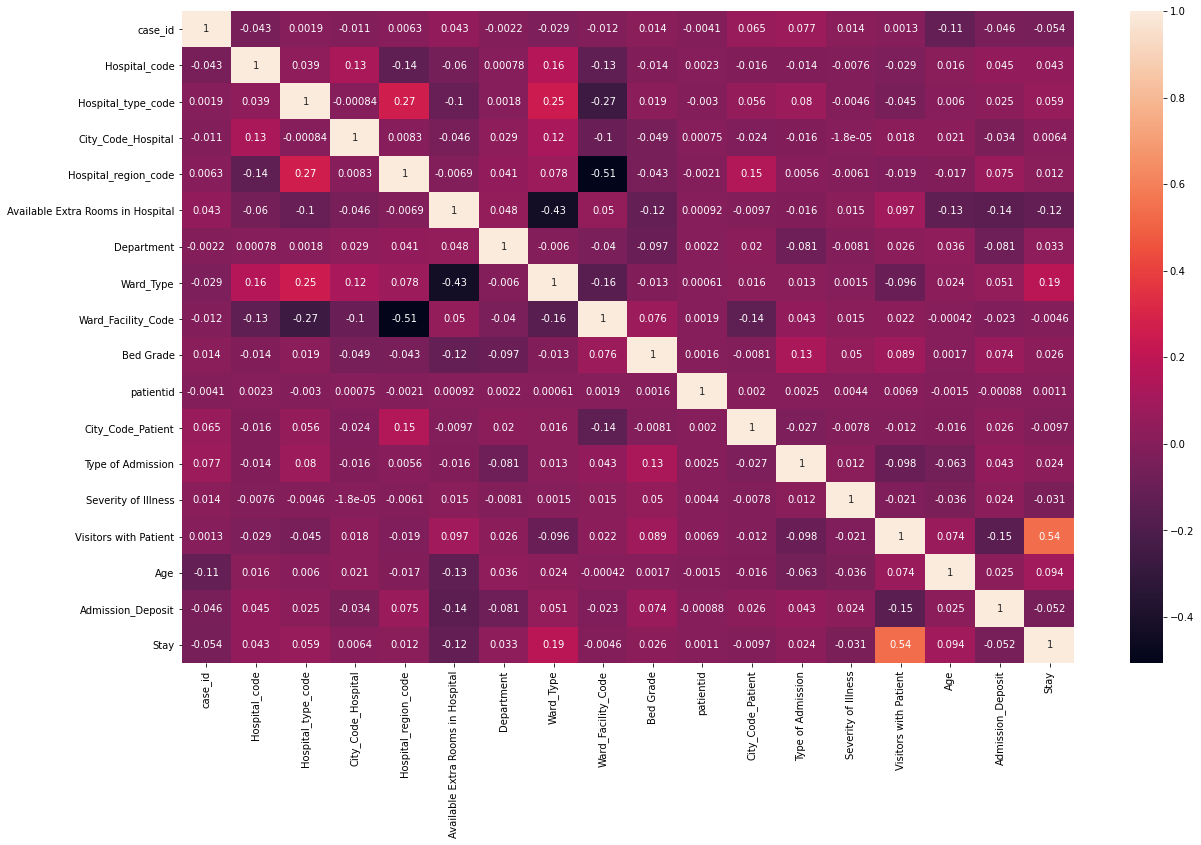

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,12))
sns.heatmap(train1.corr(),annot = True)

### Observation:
1. You can drop either ward_facility_code or hospital_region_code ---> drop ward_facility_code it has very less and -ve cor
2. you can add Hospital_code,hospital_type_code,available_exta_room,visitor_with
3. drop 

In [232]:
#train.head()
train_tobe_updated = train[['Hospital_code','Hospital_type_code','Hospital_region_code','Available Extra Rooms in Hospital','Department','Ward_Type','Bed Grade','Type of Admission','Severity of Illness','Visitors with Patient','Age','Admission_Deposit','Stay']]
train_tobe_updated.head()


,Hospital_code,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,Z,3,radiotherapy,R,2.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,Z,2,radiotherapy,S,2.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,X,2,anesthesia,S,2.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,Y,2,radiotherapy,R,2.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,Y,2,radiotherapy,S,2.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [233]:
train_tobe_updated.dtypes

Hospital_code                          int64
Hospital_type_code                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Bed Grade                            float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [234]:
train_tobe_updated.isnull().sum()


Hospital_code                          0
Hospital_type_code                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Bed Grade                            113
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   0
dtype: int64

In [235]:
train_tobe_updated.fillna(train_tobe_updated['Bed Grade'].mode()[0],inplace=True)
train_tobe_updated.head()

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Hospital_code,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,Z,3,radiotherapy,R,2.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,Z,2,radiotherapy,S,2.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,X,2,anesthesia,S,2.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,Y,2,radiotherapy,R,2.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,Y,2,radiotherapy,S,2.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [236]:
train_tobe_updated.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Bed Grade                            0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [237]:
# train_tobe_updated['Age'] = LabelEncoder().fit_transform(train_tobe_updated['Age'].values)
# train_tobe_updated['Stay'] = LabelEncoder().fit_transform(train_tobe_updated['Stay'].values)
# train1['Hospital_type_code'] = LabelEncoder().fit_transform(train1['Hospital_type_code'].values)
# train1['Hospital_type_code'] = LabelEncoder().fit_transform(train1['Hospital_type_code'].values)
# train1['Hospital_type_code'] = LabelEncoder().fit_transform(train1['Hospital_type_code'].values)
# train_tobe_updated.head()

In [238]:
# train_tobe_updated['Stay'] = train_tobe_updated['Stay'].astype('str')
# train_tobe_updated.head()


In [239]:
train_tobe_updated['Age'] = train_tobe_updated['Age'].astype('str')
train_tobe_updated.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Hospital_code,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,Z,3,radiotherapy,R,2.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,Z,2,radiotherapy,S,2.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,X,2,anesthesia,S,2.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,Y,2,radiotherapy,R,2.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,Y,2,radiotherapy,S,2.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [240]:
# train_tobe_updated['number of days stayed'] = train_tobe_updated['Stay'].apply(lambda x : '90-100' if x == 'More than 100 Days' else x )
train_tobe_updated['age of patients'] = train_tobe_updated['Age'].apply(lambda x : int(x.split('-')[1]))
train_tobe_updated['age of patients'] = train_tobe_updated['age of patients'].apply(lambda x : int(x) - int(5))
train_tobe_updated['age of patients'].value_counts()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


45    63749
35    63639
55    48514
25    40843
75    35792
65    33687
15    16768
85     7890
5      6254
95     1302
Name: age of patients, dtype: int64

In [241]:
# train_tobe_updated['number of days stayed'] = train_tobe_updated['number of days stayed'].apply(lambda x : int(x.split('-')[1]))
# train_tobe_updated['number of days stayed'].value_counts()

In [242]:
train_tobe_updated['avg spent on age'] = round(train_tobe_updated['Admission_Deposit']/train_tobe_updated['age of patients'],2)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
train_tobe_updated.head()

,Hospital_code,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,age of patients,avg spent on age
0,8,c,Z,3,radiotherapy,R,2.0,Emergency,Extreme,2,51-60,4911.0,0-10,55,89.29
1,2,c,Z,2,radiotherapy,S,2.0,Trauma,Extreme,2,51-60,5954.0,41-50,55,108.25
2,10,e,X,2,anesthesia,S,2.0,Trauma,Extreme,2,51-60,4745.0,31-40,55,86.27
3,26,b,Y,2,radiotherapy,R,2.0,Trauma,Extreme,2,51-60,7272.0,41-50,55,132.22
4,26,b,Y,2,radiotherapy,S,2.0,Trauma,Extreme,2,51-60,5558.0,41-50,55,101.05


In [244]:
# # s = str(10-20)
# s = '10-20'
# int(s.split('-'))

In [245]:
train_tobe_updated.drop(['Admission_Deposit','age of patients','Type of Admission'],axis = 1, inplace=True)
train_tobe_updated.head()

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Hospital_code,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,Severity of Illness,Visitors with Patient,Age,Stay,avg spent on age
0,8,c,Z,3,radiotherapy,R,2.0,Extreme,2,51-60,0-10,89.29
1,2,c,Z,2,radiotherapy,S,2.0,Extreme,2,51-60,41-50,108.25
2,10,e,X,2,anesthesia,S,2.0,Extreme,2,51-60,31-40,86.27
3,26,b,Y,2,radiotherapy,R,2.0,Extreme,2,51-60,41-50,132.22
4,26,b,Y,2,radiotherapy,S,2.0,Extreme,2,51-60,41-50,101.05


In [246]:
train_tobe_updated.to_csv('./dataset/data_encoded_new_withoutAge.csv',index = False)

In [179]:
x = pd.get_dummies(train_tobe_updated)
x.columns

Index(['Hospital_code', 'Available Extra Rooms in Hospital', 'Bed Grade',
       'Visitors with Patient', 'age of patients', 'avg spent on age',
       'Hospital_type_code_a', 'Hospital_type_code_b', 'Hospital_type_code_c',
       'Hospital_type_code_d', 'Hospital_type_code_e', 'Hospital_type_code_f',
       'Hospital_type_code_g', 'Hospital_region_code_X',
       'Hospital_region_code_Y', 'Hospital_region_code_Z',
       'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R',
       'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'Severity of Illness_Extreme',
       'Severity of Illness_Minor', 'Severity of Illness_Moderate',
       'Stay_0-10', 'Stay_11-20', 'Stay_21-30', 'Stay_31-40', 'Stay_41-50',
       'Stay_51-60', 'Stay_61-70', 'Stay_71-80', 'Stay_

In [ ]:
x.head()

### bivariate analysis

In [219]:
cols = train.columns
cols 

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [230]:
train.groupby(['Type of Admission', 'Severity of Illness'])['Stay'][0].plot()

IndexError: Column(s) Stay already selected

In [29]:
data_ordinal = pd.read_csv('./dataset/x_final_ordinal.csv')
data_ordinal.head(20)

,Hospital_type_code,Hospital_region_code,Department,ward rating,critical,Hospital_code,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,age of patients,avg spent on age,mean deposite per paitient,number of Department visisted
0,2.0,2.0,3.0,16.0,0.0,8,3,2.0,2,4911.0,55,89.29,5951.000000,14
1,2.0,2.0,3.0,22.0,3.0,2,2,2.0,2,5954.0,55,108.25,5951.000000,14
2,4.0,0.0,1.0,21.0,3.0,10,2,2.0,2,4745.0,55,86.27,5951.000000,14
3,1.0,1.0,3.0,14.0,3.0,26,2,2.0,2,7272.0,55,132.22,5951.000000,14
4,1.0,1.0,3.0,20.0,3.0,26,2,2.0,2,5558.0,55,101.05,5951.000000,14
5,0.0,0.0,1.0,22.0,3.0,23,2,2.0,2,4449.0,55,80.89,5951.000000,14
6,5.0,1.0,3.0,18.0,0.0,32,1,3.0,2,6167.0,55,112.13,5951.000000,14
7,0.0,0.0,3.0,10.0,3.0,23,4,3.0,2,5571.0,55,101.29,5951.000000,14
8,3.0,1.0,2.0,12.0,3.0,1,2,4.0,2,7223.0,55,131.33,5951.000000,14
9,4.0,0.0,2.0,21.0,3.0,10,2,3.0,2,6056.0,55,110.11,5951.000000,14
